<a href="https://colab.research.google.com/github/jalilabdelhamid/Deterministic/blob/main/Deterministic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Define spectrum**


In [59]:
import numpy as np

# x_E in [MeV]
# x_T in [K]
x_T=300.0

def fission_spectrum(x_E):
  return np.exp(-1.036 * x_E) * np.sinh(np.sqrt(2.29 * x_E))

def down_spectrum(x_E):
  return 1/x_E

def thermal_spectrum(x_E,x_T):
  return x_E * np.exp(-x_E /(x_T * 8.617333262e-5))



# Define geometry & mat:


*   Fuel: circle (r=1cm) UO2
*   Clad: circle (r=1cm) UO2
*   Moderator: square (a=2cm) H2O






Download cross section ENDF/BVII.1 (HDF5) source OPENMC

In [21]:
!wget https://anl.box.com/shared/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
!tar -xvf 9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz


--2022-12-12 19:11:27--  https://anl.box.com/shared/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
Resolving anl.box.com (anl.box.com)... 74.112.186.144
Connecting to anl.box.com (anl.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz [following]
--2022-12-12 19:11:28--  https://anl.box.com/public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
Reusing existing connection to anl.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://anl.app.box.com/public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz [following]
--2022-12-12 19:11:28--  https://anl.app.box.com/public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
Resolving anl.app.box.com (anl.app.box.com)... 74.112.186.144
Connecting to anl.app.box.com (anl.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud.com/d/1/b1!D_J6ba

In [60]:
import h5py
%cd endfb-vii.1-hdf5
%cd neutron

f = h5py.File('H1.h5', 'r')
%cd ../..

list(f['H1']['reactions']['reaction_002']['294K'].keys())

/content/endfb-vii.1-hdf5
/content/endfb-vii.1-hdf5/neutron
/content


['xs']

In [61]:
dset_energy = f['H1']['energy']['294K']
dset_micro_xs = f['H1']['reactions']['reaction_002']['294K']['xs']
x = np.zeros(dset_energy.size)
y = np.zeros(dset_energy.size)
y_f = np.zeros(dset_energy.size)
for i in range (0,dset_energy.size):
  #print(f"enery= {dset_energy[i]}   {dset_micro_xs[i]}")
  x[i] = dset_energy[i] 
  y[i] = dset_micro_xs[i]
  y_f[i] = thermal_spectrum(x[i] ,300.0)


In [63]:
print(thermal_spectrum(1,300.0))

1.5875937551666035e-17


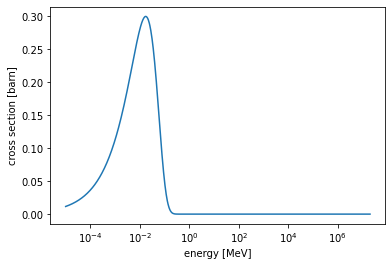

In [69]:
import matplotlib.pyplot as plt
#plt.plot(x,y,label="cross section")
z= y*y_f
plt.plot(x,z,label="spectrum")
plt.ylabel('cross section [barn]')
plt.xlabel('energy [MeV]')
#plt.yscale('log')
plt.xscale('log')
plt.show()